In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

25: ego, 24:target

In [2]:
v24 = pd.read_csv('veh24.csv')
v24_length = v24['length']
v24_width  = v24['width']
v24x = v24['x']
v24y = v24['y']
v24h = v24['psi_rad']

v25 = pd.read_csv('veh25.csv')
v25_length = np.asarray(v25['length'])
v25_width  = np.asarray(v25['width'])
v25x = np.asarray(v25['x'])
v25y = np.asarray(v25['y'])
v25h = np.asarray(v25['psi_rad'])

vvhdg   = np.unwrap(np.asarray(v25h-v24h))

In [3]:
### taken from:
### https://github.com/interaction-dataset/interaction-dataset/blob/master/python/utils/tracks_vis.py

def rotate_around_center(pts, center, yaw):
    a = pts - center;
    b = np.array([[np.cos(yaw), np.sin(yaw)], [-np.sin(yaw), np.cos(yaw)]])
    c = np.zeros((a.shape))
    for i in range(0,a.shape[2]):
        c[:,:,i] = np.dot(a[:,:,i] , b[:,:,i])
    return c + center

def polygon_xy_from_motionstate(x, y, psi_rad, width, length):
    lowleft  = (x - length / 2., y - width / 2.)
    lowright = (x + length / 2., y - width / 2.)
    upright  = (x + length / 2., y + width / 2.)
    upleft   = (x - length / 2., y + width / 2.)
    return rotate_around_center(np.array([lowleft, lowright, upright, upleft]), np.array([x, y]), yaw=psi_rad)

In [4]:
veh24polygon = polygon_xy_from_motionstate(v24x, v24y, v24h, v24_width, v24_length)
veh25polygon = polygon_xy_from_motionstate(v25x, v25y, v25h, v25_width, v25_length)

In [5]:
veh24_rel_txRR_long = veh25polygon[2,0,:] - veh24polygon[0,0,:]
veh24_rel_txRR_lat  = -(veh25polygon[2,1,:] - veh24polygon[0,1,:])

veh24_rel_txRL_long = veh25polygon[2,0,:] - veh24polygon[3,0,:]
veh24_rel_txRL_lat  = -(veh25polygon[2,1,:] - veh24polygon[3,1,:])

In [6]:
dt_interaction = 0.1
t_interaction  = np.linspace(0, dt_interaction*v24x.shape[0], v24x.shape[0])
t_desired      = np.linspace(0, dt_interaction*v24x.shape[0], 100*v24x.shape[0])

x_RL = np.interp(t_desired, t_interaction, veh24_rel_txRL_lat)
y_RL = np.interp(t_desired, t_interaction, veh24_rel_txRL_long)
x_RR = np.interp(t_desired, t_interaction, veh24_rel_txRR_lat)
y_RR = np.interp(t_desired, t_interaction, veh24_rel_txRR_long)
hdg  = np.interp(t_desired, t_interaction, np.rad2deg(vvhdg))

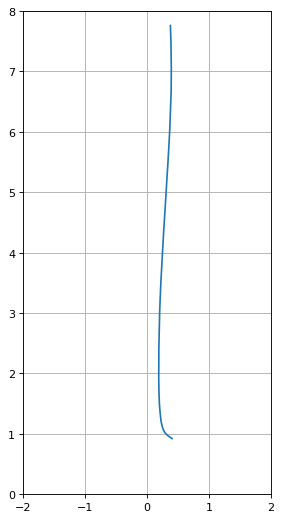

In [7]:
fig, ax = plt.subplots(figsize=(4, 8), dpi=80)
ax.plot(x_RR, y_RR)
ax.grid()
plt.xlim([-2.0, 2.0])
plt.ylim([0, 8])
plt.show()

In [8]:
np.savez('interaction.npz', x_RR=x_RR,y_RR=y_RR, x_RL=x_RL, y_RL=y_RL, hdg=hdg)